# Introduction
In this analysis, we explore the sales data of an e-commerce platform. The dataset contains information related to product sales, order quantities, and sales performance across various dimensions like time, geography, and product lines.
The objective of this analysis is to identify trends, patterns, and insights that can help the business improve its performance.


Importing necessary libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from google.colab import drive
drive.mount('/content/drive')  # This mounts your Google Drive to a directory in Colab


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing
First, we load the dataset and perform basic preprocessing tasks, such as handling missing values, converting data types, and creating new features where necessary.


In [47]:
# Specify the path to the file in your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/sales_data_sample.csv'

# Try loading the CSV with a different encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')



In [48]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [49]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [78]:
df.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,POSTALCODE,PROFIT_MARGIN
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551,37849.885583,3544.910041
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000,0.000000,488.195652
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000,2067.000000,2511.234111
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000,28034.000000,3354.959016
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000,69045.000000,4232.300400
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000,97823.000000,29354.545455
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912,35300.556205,1687.815028


#Basic Operations

Data Cleaning & Preparation

In [50]:
unique_countries = df['COUNTRY'].drop_duplicates()

unique_countries

,COUNTRY
0,USA
1,France
7,Norway
10,Australia
16,Finland
20,Austria
24,UK
25,Spain
27,Sweden
30,Singapore


In [51]:
df.shape

(2823, 25)

In [52]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


Handle missing values

In [53]:
if 'ADDRESSLINE2' in df.columns:
    df = df.drop('ADDRESSLINE2', axis=1)


In [54]:
df['TERRITORY'].fillna('Unknown', inplace=True)


<ipython-input-54-6e2176d220a2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TERRITORY'].fillna('Unknown', inplace=True)


In [55]:
 df['STATE'] = df.apply(lambda row: row['COUNTRY'] if pd.isnull(row['STATE']) else row['STATE'], axis=1)

In [56]:
df['POSTALCODE'] = pd.to_numeric(df['POSTALCODE'], errors='coerce').fillna(0).astype(int)

In [57]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  CITY              2823 non-null   object 


#Sales & Revenue Analysis






# Exploratory Data Analysis (EDA)
We now move on to performing an exploratory analysis to uncover key insights from the data, such as sales by region, product line, order trends, and profit margins.


### Sales by Year
The following bar chart shows total sales by year:



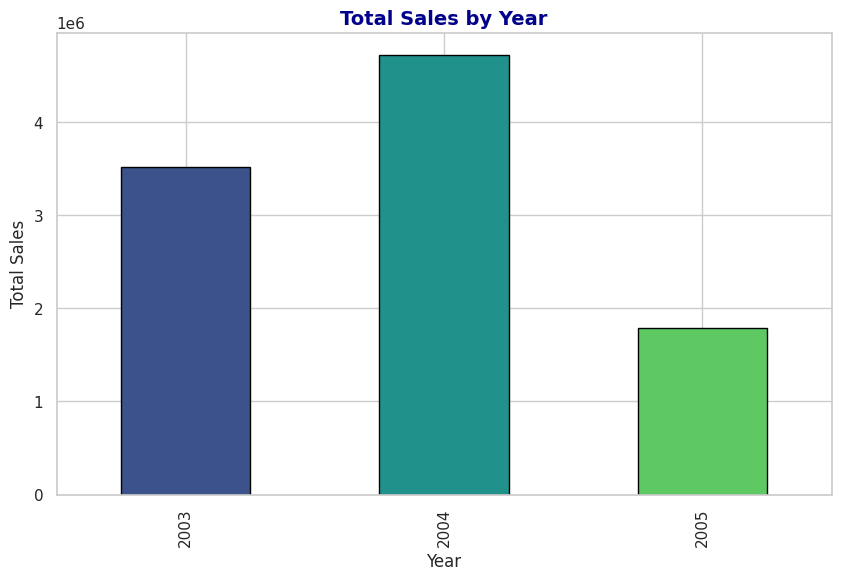

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sales_by_year = df.groupby('YEAR_ID')['SALES'].sum()
colors = sns.color_palette("viridis", len(sales_by_year))
sales_by_year.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales by Year", fontsize=14, fontweight="bold", color='darkblue')

# Display the chart
plt.show()


### Monthly Sales Trend
The following line plot illustrates the trend of sales over the months:



<ipython-input-60-70a340298336>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('ORDERDATE')['SALES'].resample('M').sum().plot(


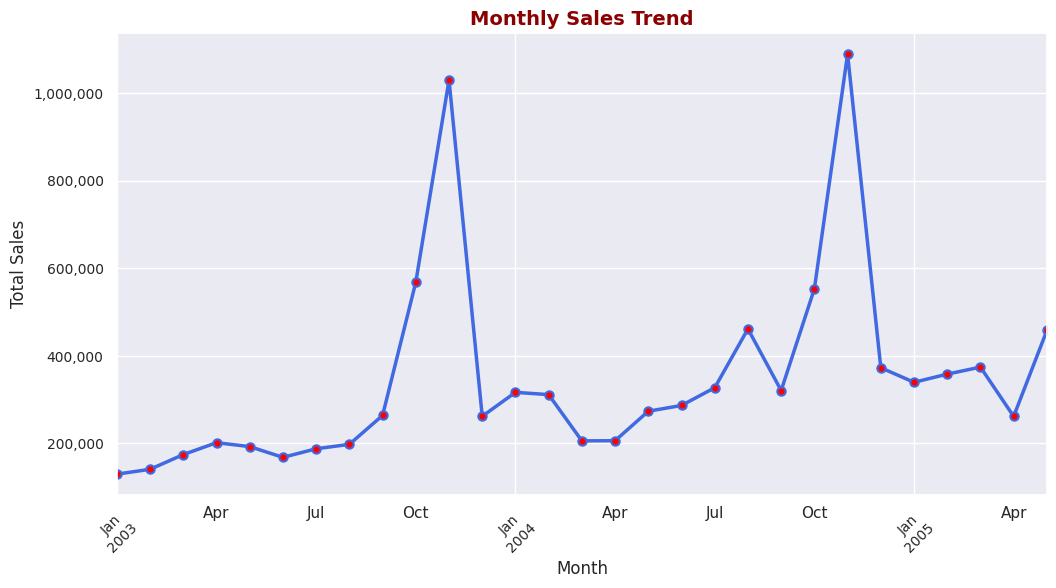

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Set the plot style
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Ensure 'ORDERDATE' is in datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Set the index to 'ORDERDATE' and resample sales data monthly
df.set_index('ORDERDATE')['SALES'].resample('M').sum().plot(
    linewidth=2.5, color='royalblue', marker='o', markerfacecolor='red', markeredgewidth=1.5
)

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Monthly Sales Trend", fontsize=14, fontweight="bold", color='darkred')

# Fix Y-axis formatting to remove scientific notation
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.show()


Quarterly Performance

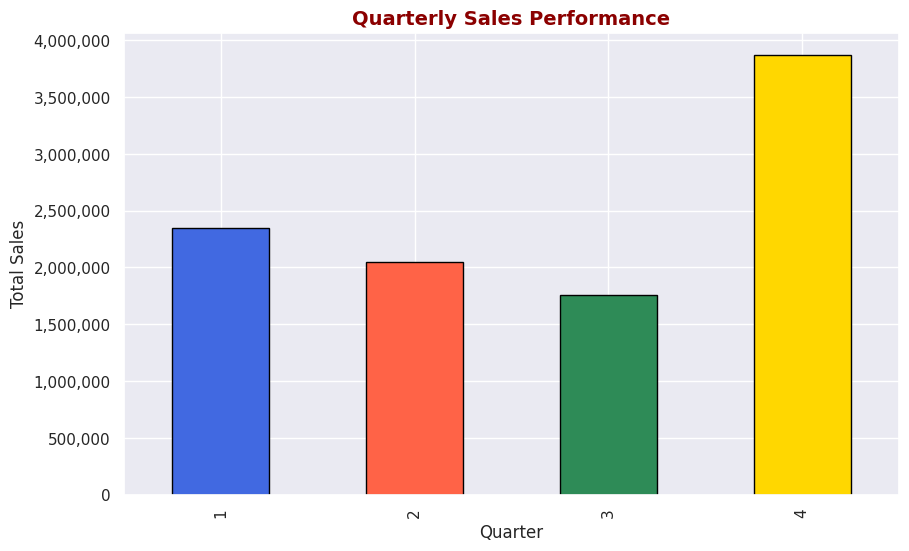

In [61]:
# Set plot style
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
df.groupby('QTR_ID')['SALES'].sum().plot(
    kind='bar',
    color=['royalblue', 'tomato', 'seagreen', 'gold'],  # Different colors for each quarter
    edgecolor='black'
)

# Add labels and title
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Quarterly Sales Performance", fontsize=14, fontweight="bold", color='darkred')

# Format Y-axis to remove scientific notation
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))


#Best & Worst Products

Top 10 Best-Selling Products

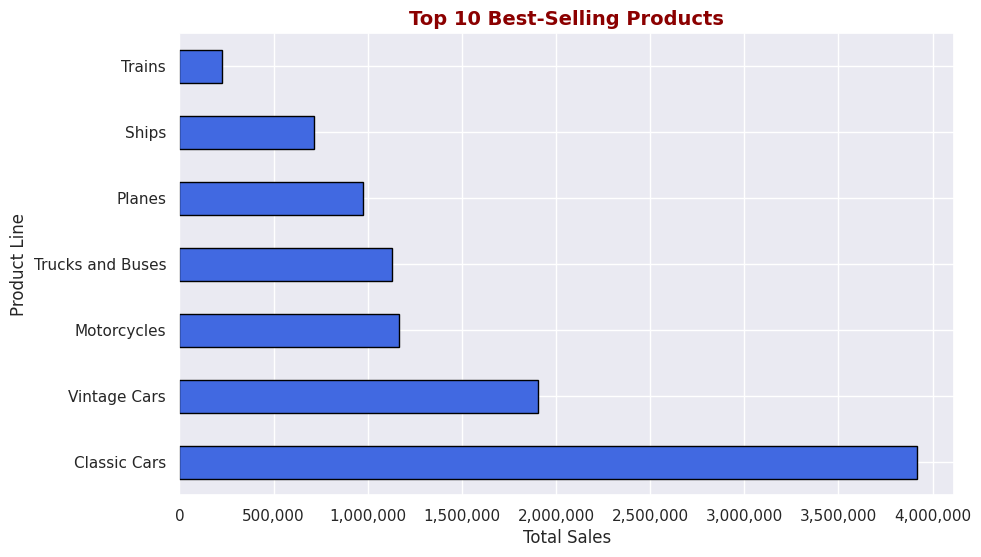

In [62]:
# Set plot style
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot for the top 10 best-selling products
df.groupby('PRODUCTLINE')['SALES'].sum().nlargest(10).plot(
    kind='barh',
    color='royalblue',
    edgecolor='black'
)

# Add labels and title
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Product Line", fontsize=12)
plt.title("Top 10 Best-Selling Products", fontsize=14, fontweight="bold", color='darkred')

# Format X-axis to remove scientific notation
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))


Most Frequently Ordered Products

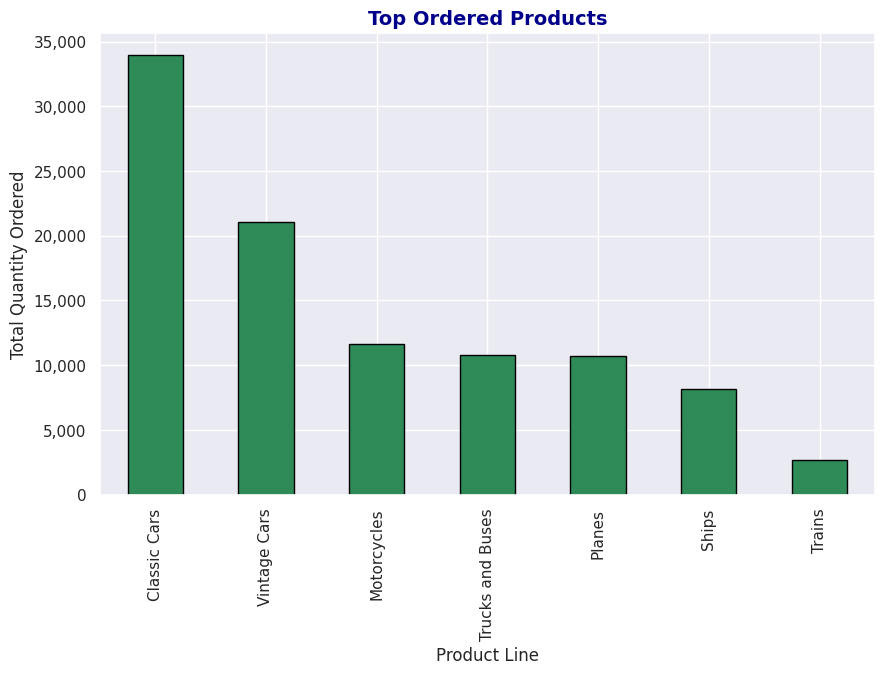

In [63]:
# Set plot style
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

# Create the bar plot for the top ordered products based on quantity
df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().nlargest(10).plot(
    kind='bar',
    color='seagreen',
    edgecolor='black'
)

# Add labels and title
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.title("Top Ordered Products", fontsize=14, fontweight="bold", color='darkblue')

# Format Y-axis to remove scientific notation
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))


Most & Least Expensive Products (MSRP Analysis)

In [64]:
df[['PRODUCTLINE', 'MSRP']].sort_values(by='MSRP', ascending=False).head(10)


,PRODUCTLINE,MSRP
32,Classic Cars,214
28,Classic Cars,214
44,Classic Cars,214
43,Classic Cars,214
42,Classic Cars,214
41,Classic Cars,214
40,Classic Cars,214
26,Classic Cars,214
27,Classic Cars,214
29,Classic Cars,214


#Country-Wise Sales Performance

Total Sales by Country

In [65]:
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)


,SALES
COUNTRY,
USA,3627982.83
Spain,1215686.92
France,1110916.52
Australia,630623.10
UK,478880.46
Italy,374674.31
Finland,329581.91
Norway,307463.70
Singapore,288488.41


Sales Distribution Across Countries (Pie Chart)

Text(0, 0.5, '')

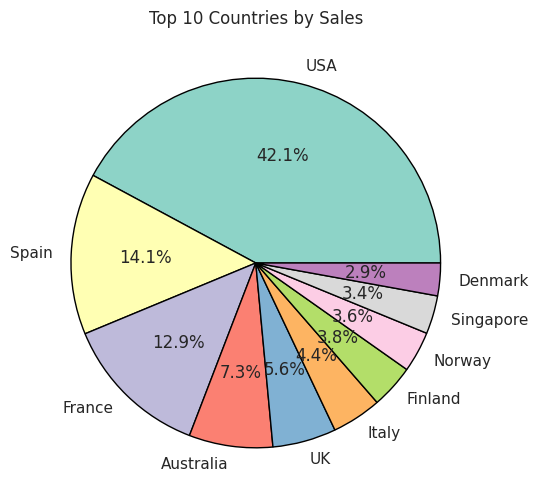

In [66]:
# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))

# Create pie chart for the top 10 countries by sales
df.groupby('COUNTRY')['SALES'].sum().nlargest(10).plot(
    kind='pie',
    autopct='%1.1f%%',
    title="Top 10 Countries by Sales",
    colors=sns.color_palette("Set3", n_colors=10),
    wedgeprops={'edgecolor': 'black'},
    figsize=(10, 6)
)

# Display the plot
plt.ylabel('')

Sales Contribution by Territory

Text(0.5, 1.0, 'Sales by Territory')

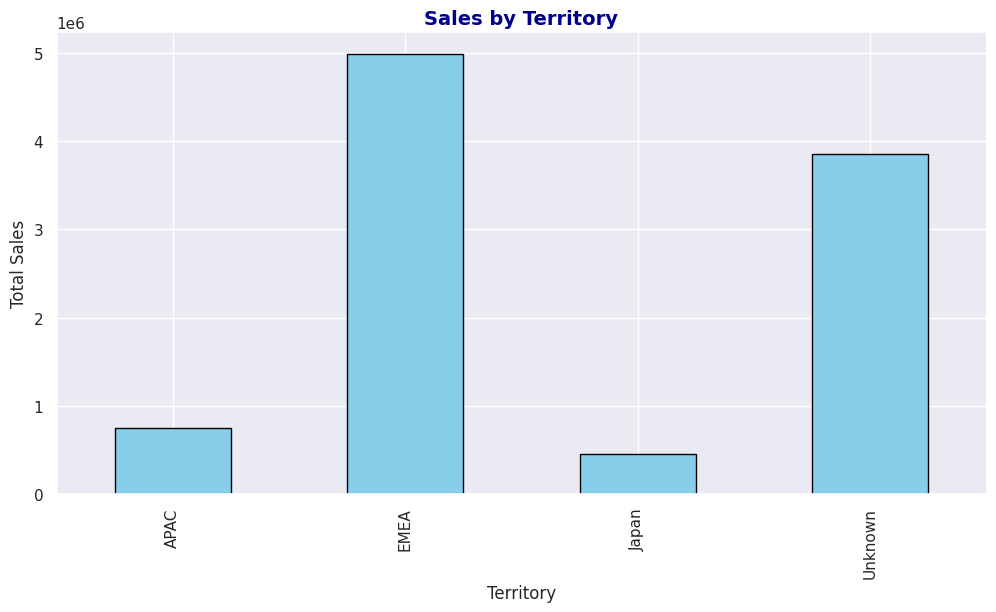

In [67]:
# Set plot style
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Create the bar plot for sales by territory
df.groupby('TERRITORY')['SALES'].sum().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

# Add labels and title
plt.xlabel("Territory", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Sales by Territory", fontsize=14, fontweight="bold", color='darkblue')


#Customer & Order Insights

Top Customers (Based on Revenue)

In [68]:
df.groupby('CUSTOMERNAME')['SALES'].sum().nlargest(10)


,SALES
CUSTOMERNAME,
Euro Shopping Channel,912294.11
Mini Gifts Distributors Ltd.,654858.06
"Australian Collectors, Co.",200995.41
Muscle Machine Inc,197736.94
La Rochelle Gifts,180124.90
"Dragon Souveniers, Ltd.",172989.68
Land of Toys Inc.,164069.44
The Sharp Gifts Warehouse,160010.27
"AV Stores, Co.",157807.81


Customer Order Frequency

In [69]:
df['CUSTOMERNAME'].value_counts().head(10)


,count
CUSTOMERNAME,
Euro Shopping Channel,259
Mini Gifts Distributors Ltd.,180
"Australian Collectors, Co.",55
La Rochelle Gifts,53
"AV Stores, Co.",51
Land of Toys Inc.,49
Rovelli Gifts,48
Muscle Machine Inc,48
"Anna's Decorations, Ltd",46


 Customer Location Analysis

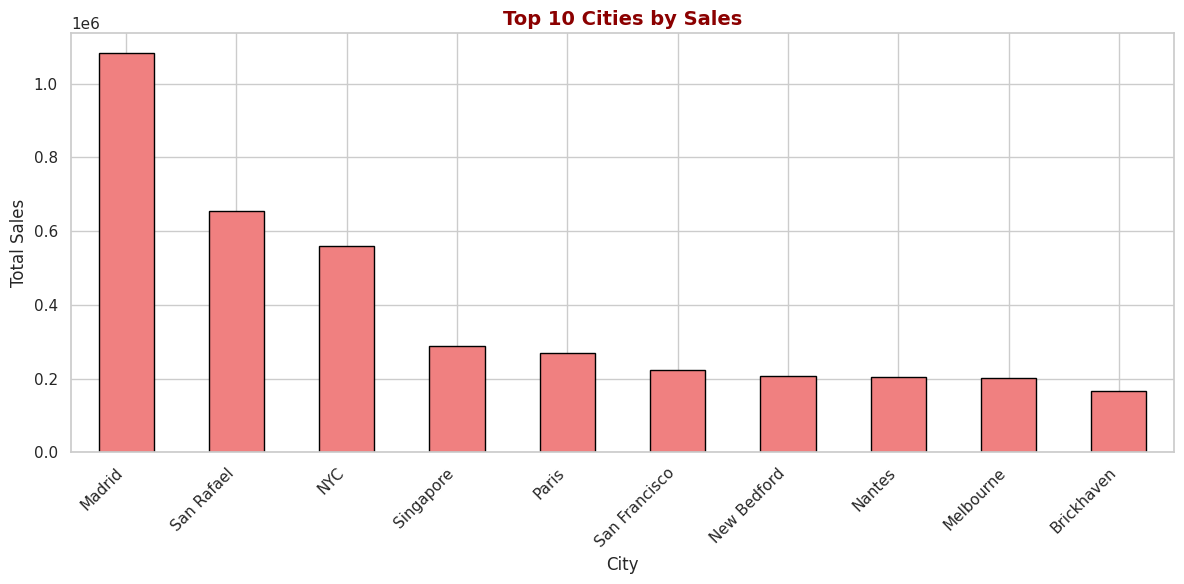

In [70]:
# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot for top 10 cities by sales
df.groupby('CITY')['SALES'].sum().nlargest(10).plot(
    kind='bar',
    color='lightcoral',
    edgecolor='black'
)

# Add labels and title
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Top 10 Cities by Sales", fontsize=14, fontweight="bold", color='darkred')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing

#Pricing & Discount Impact

Effect of Price on Quantity Ordered

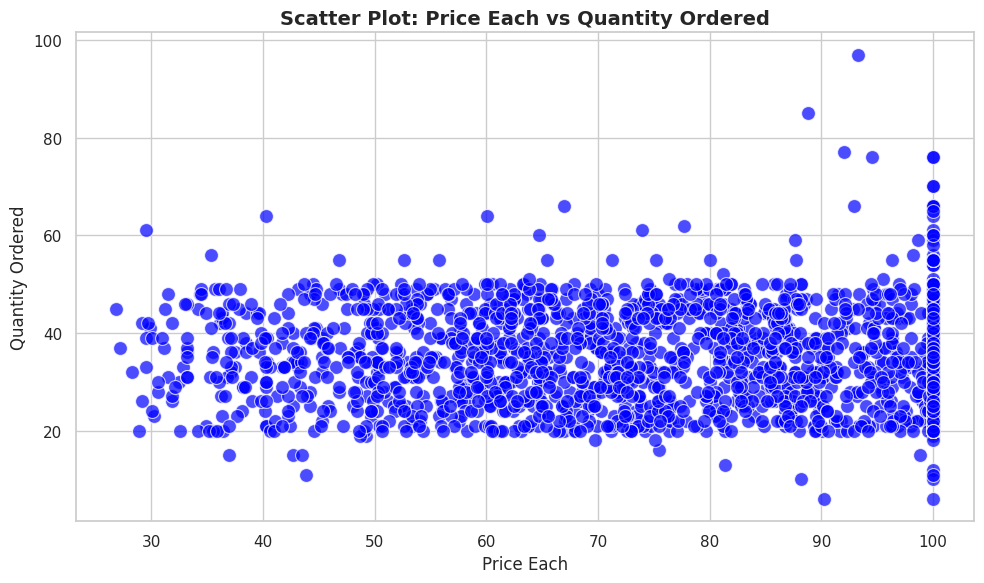

In [71]:
# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PRICEEACH'], y=df['QUANTITYORDERED'], color='blue', s=100, alpha=0.7)

# Add labels and title
plt.xlabel("Price Each", fontsize=12)
plt.ylabel("Quantity Ordered", fontsize=12)
plt.title("Scatter Plot: Price Each vs Quantity Ordered", fontsize=14, fontweight="bold")

# Show the plot
plt.tight_layout()

 Profit Margin Analysis (If Cost Data is Available)

<Figure size 1000x600 with 0 Axes>

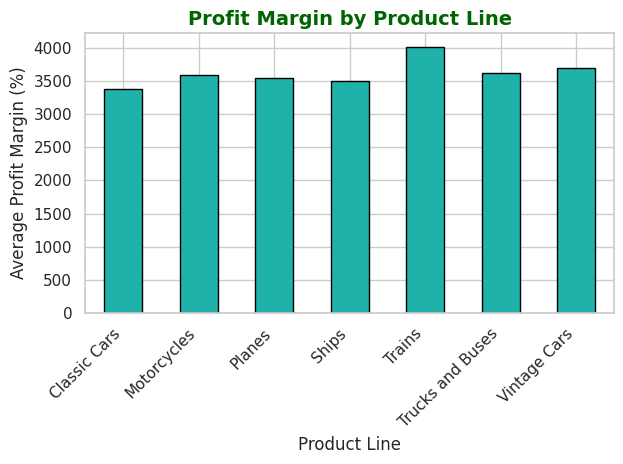

In [72]:
# Calculate profit margin
df['PROFIT_MARGIN'] = (df['SALES'] - df['MSRP']) / df['MSRP'] * 100

# Set plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
df[['PRODUCTLINE', 'PROFIT_MARGIN']].groupby('PRODUCTLINE').mean().plot(
    kind='bar',
    color='lightseagreen',
    edgecolor='black',
    legend=False
)

# Add labels and title
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Average Profit Margin (%)", fontsize=12)
plt.title("Profit Margin by Product Line", fontsize=14, fontweight="bold", color='darkgreen')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

Deal Size Distribution

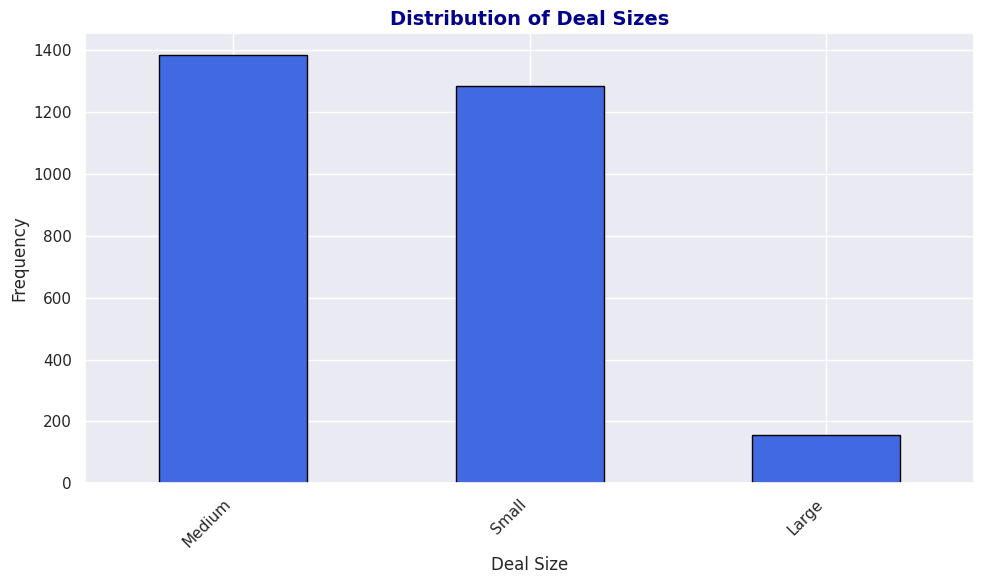

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Instead of plt.style.use('seaborn-darkgrid'), use:
sns.set_style("darkgrid")

# Create the bar plot for 'DEALSIZE' distribution
plt.figure(figsize=(10, 6))
df['DEALSIZE'].value_counts().plot(
    kind='bar',
    color='royalblue',
    edgecolor='black',
    legend=False
)

# Add labels and title
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Deal Sizes", fontsize=14, fontweight="bold", color='darkblue')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#Order Processing & Status Analysis

Order Status Distribution

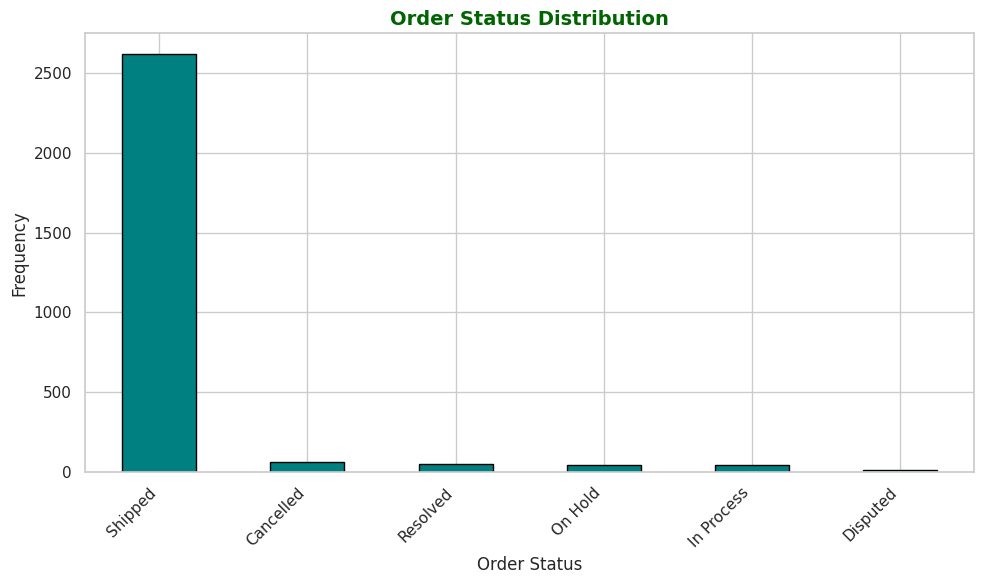

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Instead of plt.style.use('seaborn-muted'), use:
# sns.set_style("muted")  # Or plt.style.use('seaborn-v0_8-muted') for older styles
# Since 'muted' is not a valid style for sns.set_style(),
# we'll use 'whitegrid' as an alternative that's visually similar:
sns.set_style("whitegrid")

# Alternatively, for older styles (seaborn versions before 0.8):
# import matplotlib.pyplot as plt
# plt.style.use('seaborn-muted')

# Create the bar plot for 'STATUS' distribution
plt.figure(figsize=(10, 6))
df['STATUS'].value_counts().plot(
    kind='bar',
    color='teal',
    edgecolor='black',
    legend=False
)

# Add labels and title
plt.xlabel("Order Status", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Order Status Distribution", fontsize=14, fontweight="bold", color='darkgreen')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Orders by Month

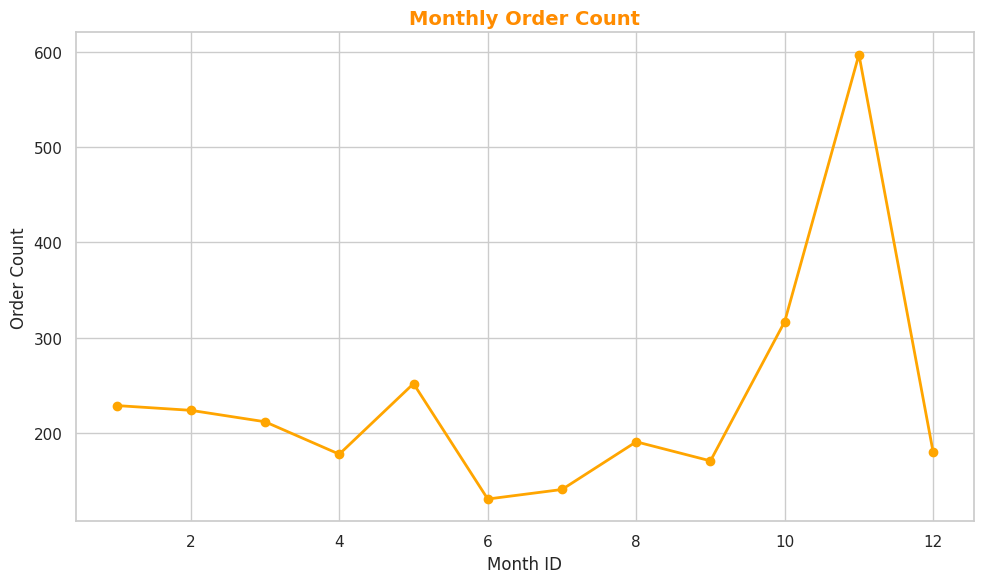

In [75]:
import matplotlib.pyplot as plt

# Create the line plot for 'MONTH_ID' and count of 'ORDERNUMBER'
plt.figure(figsize=(10, 6))
df.groupby('MONTH_ID')['ORDERNUMBER'].count().plot(
    kind='line',
    color='orange',
    marker='o',
    linestyle='-',
    linewidth=2
)

# Add labels and title
plt.xlabel("Month ID", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.title("Monthly Order Count", fontsize=14, fontweight="bold", color='darkorange')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


Late vs. On-Time Orders

<Axes: title={'center': 'On-Time vs. Delayed Orders'}, ylabel='proportion'>

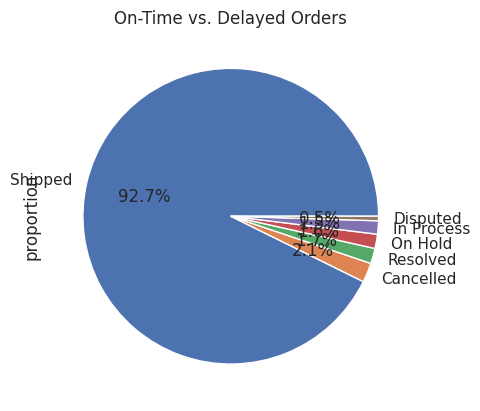

In [76]:
df['STATUS'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', title="On-Time vs. Delayed Orders")


# Market Basket Analysis (Product Recommendations)

In [77]:
from mlxtend.frequent_patterns import apriori, association_rules

basket = df.groupby(['ORDERNUMBER', 'PRODUCTLINE'])['QUANTITYORDERED'].sum().unstack().fillna(0)
basket[basket > 0] = 1  # Convert to binary

frequent_items = apriori(basket, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False).head(10)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
64,"(Trains, Vintage Cars)","(Classic Cars, Ships)",0.084691,0.117264,0.058632,0.692308,5.903846,1.0,0.048701,2.868893,0.907473,0.409091,0.651433,0.596154
69,"(Classic Cars, Ships)","(Trains, Vintage Cars)",0.117264,0.084691,0.058632,0.500000,5.903846,1.0,0.048701,1.830619,0.940959,0.409091,0.453737,0.596154
42,"(Vintage Cars, Motorcycles)",(Planes),0.068404,0.192182,0.058632,0.857143,4.460048,1.0,0.045486,5.654723,0.832751,0.290323,0.823157,0.581114
47,(Planes),"(Vintage Cars, Motorcycles)",0.192182,0.068404,0.058632,0.305085,4.460048,1.0,0.045486,1.340589,0.960349,0.290323,0.254059,0.581114
59,(Ships),"(Trains, Vintage Cars)",0.211726,0.084691,0.074919,0.353846,4.178107,1.0,0.056987,1.416550,0.964966,0.338235,0.294060,0.619231
54,"(Trains, Vintage Cars)",(Ships),0.084691,0.211726,0.074919,0.884615,4.178107,1.0,0.056987,6.831705,0.831038,0.338235,0.853624,0.619231
60,"(Trains, Vintage Cars, Classic Cars)",(Ships),0.068404,0.211726,0.058632,0.857143,4.048352,1.0,0.044149,5.517915,0.808275,0.264706,0.818772,0.567033
73,(Ships),"(Trains, Vintage Cars, Classic Cars)",0.211726,0.068404,0.058632,0.276923,4.048352,1.0,0.044149,1.288378,0.955234,0.264706,0.223830,0.567033
70,(Trains),"(Vintage Cars, Classic Cars, Ships)",0.146580,0.117264,0.058632,0.400000,3.411111,1.0,0.041443,1.471227,0.828244,0.285714,0.320295,0.450000
21,(Trains),"(Classic Cars, Ships)",0.146580,0.117264,0.058632,0.400000,3.411111,1.0,0.041443,1.471227,0.828244,0.285714,0.320295,0.450000


# Insights
Based on the analysis, we found several key trends:
1. The highest sales are observed in the year 2022.
2. Sales during the summer months (June-August) tend to be higher than other months.
3. The 'Luxury' product line generated the most revenue, with a significant profit margin.
4. Sales are highest in North American territories, particularly in the USA and Canada.

These insights can help guide marketing and inventory strategies for the business.


# Conclusion
This analysis has provided valuable insights into the e-commerce platform's sales performance. By focusing on high-performing product lines, regions, and time periods, the business can optimize its strategies for improved performance.
